# Getting started with Matplotlib and `segretini-matplottini`, with a barplot

If you are here, chances are that you are tired of dull spreadsheet-like plots, and you want to bring your visualization skills to the next level to obtain a fabled `the paper's plots are so beautiful` comment from Reviewer #2.

🚂 Let's get started! In this notebook, we will see an introduction to [Matplotlib](https://matplotlib.org) and [Seaborn](https://seaborn.pydata.org), but most importantly to some of the key concepts to keep in mind when creating a great visualization. We will also see how `segretini-matplottini` can make our life easier, speeding up some of the complexity related to bringing your plots up to shape.

In the end, we will no longer create plots like the one to the left, and we will be able to create plots like the one to the right.

<div>
<img src="../plots/notebooks/1_getting_started_with_barplots/the_ugliest_barplot.png" height="300"/>
<img src="../plots/notebooks/1_getting_started_with_barplots/a_much_better_barplot.png" height="300"/>
</div>

## Exploratory visualization vs message-delivery plotting

Not all visualizations are created with the same goal. As such, not all plots have the same needs.
A major distinction happens between the following two categories: **exploratory visualization** and **message-delivery plotting**, a name I just made up and that will be clear in a second.

### 🔎 Exploratory visualization
The idea of exploratory visualization is that you have some data that you know very little about, and you want to learn something more about it. The main point is that **you don't know yet what you are looking for**. You might have a hint, but the unknowns are more than what's known.
The most common situation is *exploratory data analysis*: you have a dataset, and want to understand something about it, e.g. class distributions, with the goal of building a predicting model that can leverage this newly discovered information.
Another common situation is where you run a very complex experiment that tracks many metrics over multiple benchmark datasets. You don't know in advance what to expect, and you can use an exploratory visualization to make order in the chaos.

Exploratory visualization lies in the world of fast prototyping. The main audience of an exploratory visualization is **yourself** (or a narrow pool of people who's knowledeable about the topic). **The goal is to use visualizations to understand something new.**

### ⭐️ Message-delivery plotting

In message-delivery plotting, you want to convey a message to an external target audience, and you need to convince this audience that your message is true. 
For example, that your algorithm is more accurate than all the existing implementations of that same algorithm. 
How to best deliver this message is up to you: a sentence, a table, or a visualization. In many cases, a well-made visualization is the most impactful approach.

In this situation, you know exactly what you want to show, and your goal is to show it in the **clearest way possible**. It has to be polished, curated, clutter-free. It takes a long time, trial and error, and patience.

Message-delivery plotting is the focus of this notebook, and of `segretini-matplottini`. We don't focus on exploratory visualization. If you want to know more about exploratory visualization, there are plenty of valid options, such as Seaborn's [`FacetGrid`](https://seaborn.pydata.org/tutorial/axis_grids.html) and [Plotly](https://plotly.com/python/).

## Getting started

To run the following code, install `segretini-matplottini` as explained in the [README](../README.md). As a reminder, the following should suffice.

```shell
git clone https://github.com/AlbertoParravicini/segretini-matplottini.git
cd segretini-matplottini
pip install ".[notebook]"
jupyter notebook notebooks/1_getting_started_with_barplots.ipynb
```

# Building a plot with Matplotlib

Matplotlib's plots are created by building a `Figure` and one or more `Axes` within the `Figure`. Each `Axes` is a single plot (for example, a barplot), and a `Figure` can contain multiple `Axes` (for example, a grid of barplots). The following code shows how to build the simplest plot, which, for now, is empty.

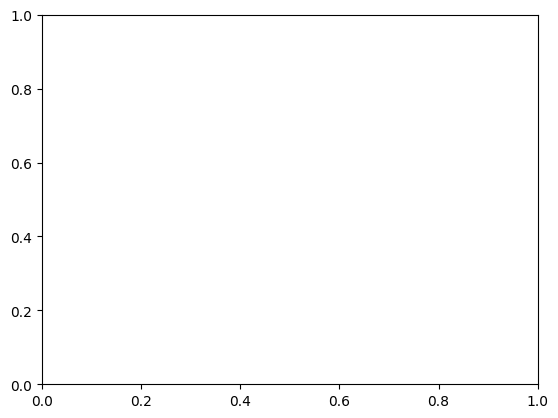

In [4]:
# This is the main plotting library in Matplotlib;
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes

# Reset Matplotlib to its default style settings;
plt.rcdefaults()

# Build a Figure containing a single Axes;
fig: Figure
ax: Axes
fig, ax = plt.subplots(nrows=1, ncols=1)

# Show the empty plot;
plt.show()

Let's unpack what we did above 🙌

First, we called `plt.rcdefaults()`. That's a bit out of the blue, but it's a very important command to remember. Matplotlib keeps a global state of style-related settings (we'll see later how to modify them), and this command ensures that everything is brought back to its default value before creating a plot. Without `plt.rcdefaults()`, it is easy to override some setting when creating multiple plots in the same script. Calling `plt.rcdefaults()` ensures that we always start from a blank state.

Then, we created a `Figure` with `plt.figure()`, and the figure contains a single `Axes` (that is, an `x-axis` and a `y-axis`). 
* We can pass additional arguments to `plt.subplots` to control the number of `Axes`, their layout, and the resolution of the plot. We'll see some of these options later.
    
Finally, we called `plt.show()` to display the plot. 
* The command can be omitted when working in a Jupyter notebook, as the plot will be displayed automatically. However, it is necessary when working in a Python script. 
* An even better practice, when writing a script, would be to call `fig.show()` instead of `plt.show()`, as it explicitly specifies which is the `Figure` to display.

Indeed, Matplotlib provides some shorthands to access the latest `Figure` and `Axes` available. 
  * To access the latest `Figure`, we can use `plt.gcf()`, and to access the latest `Axes`, we can use `plt.gca()`.
  * One can call `plt.show()` instead of `fig.show()`. That's equivalent to calling `plt.gcf().show()`.
  * Similarly, one can call `plt.save()` instead of `fig.save()`, or `plt.plot()` instead of `ax.plot()`.
  * My advice is to always use the `Figure` and `Axes` objects explicitly, as it reduces the chance of errors when working with multiple `Figures` and `Axes`.

# Let's load some data

We will use a simple dataset in this notebook. It contains the estimated quality of different predictive models over a few different datasets.

Remember that we are not doing an exploratory visualization, but we want to visualize some known results to convey a message. We know in advance the structure of the data we are loading, and we most likely know what to expect from this data. 
For example, we know that a certain model gave better predictions than another, and we want to show it in out plot.

We use `pandas` to handle datasets, since we are going to create plots that benefit from a tabular representation.

In [9]:
import pandas as pd

# Load the data from the CSV;
data = pd.read_csv("../data/notebooks/1_getting_started_with_barplots/barplot_data.csv")

# This prints the dataset in a nice format, in the notebook;
data

,model,dataset,value
0,A,dataset_10,0.15
1,A,dataset_2,1.22
2,A,dataset_4,0.30
3,A,dataset_1,0.45
4,A,dataset_3,0.31
5,B,dataset_10,0.35
6,B,dataset_2,1.47
7,B,dataset_4,0.63
8,B,dataset_1,0.72
9,B,dataset_3,0.75


If we look at the data, we see that there are three models, and five datasets. In our experiments, model `A` is a baseline, which performs quite poorly. Model `B` is the current state-of-the-art, and model `C` is our new amazing model.
Overall, model `C` is the best, when averaged across all datasets, and we want show that!

In [11]:
data.groupby("model").mean(numeric_only=True).sort_values("value", ascending=False)

,value
model,
C,0.906
B,0.784
A,0.486
